Nama : Ilham Maulana UtsMachineLearning PT:Univ Bina Insani

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#mengimpor data
dataset = pd.read_csv("../input/balance-scale/balance-scale.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
sex = pd.get_dummies(dataset["Class"], drop_first=True)
sex

,L,R
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
620,1,0
621,1,0
622,1,0
623,1,0


In [4]:
dataset =pd.concat([dataset, sex], axis=1)
dataset

,Class,L-Weight,L-Distance,R-Weight,R-Distance,L,R
0,B,1,1,1,1,0,0
1,R,1,1,1,2,0,1
2,R,1,1,1,3,0,1
3,R,1,1,1,4,0,1
4,R,1,1,1,5,0,1
...,...,...,...,...,...,...,...
620,L,5,5,5,1,1,0
621,L,5,5,5,2,1,0
622,L,5,5,5,3,1,0
623,L,5,5,5,4,1,0


In [5]:
dataset.drop("Class",axis=1 ,inplace=True)
dataset

,L-Weight,L-Distance,R-Weight,R-Distance,L,R
0,1,1,1,1,0,0
1,1,1,1,2,0,1
2,1,1,1,3,0,1
3,1,1,1,4,0,1
4,1,1,1,5,0,1
...,...,...,...,...,...,...
620,5,5,5,1,1,0
621,5,5,5,2,1,0
622,5,5,5,3,1,0
623,5,5,5,4,1,0


In [6]:
#membagi dataset menjadi training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
#Featue Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#membuat model K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [9]:
# Memprediksi Test set
y_pred = classifier.predict(X_test)

In [10]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

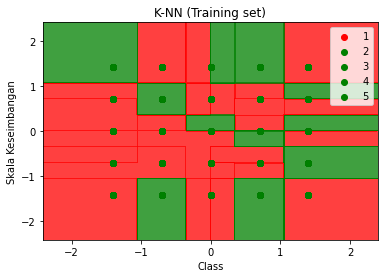

In [11]:
# Visualisasi hasil Training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop =
X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop =
X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Class')
plt.ylabel('Skala Keseimbangan')
plt.legend()
plt.show()

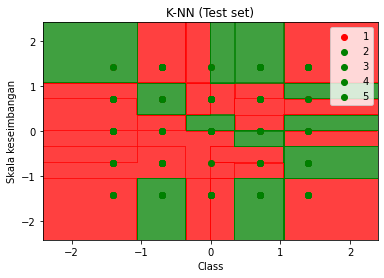

In [12]:
# Visualisasi hasil Test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop =
X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop =
X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Class')
plt.ylabel('Skala keseimbangan')
plt.legend()
plt.show()